# Quantum Teleportation Simulation with Qiskit

In [72]:
# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer
from qiskit.visualization import plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector

### We first generate the bell state:
$$\frac{1}{\sqrt{2}}(\ket{00}+\ket{11})$$

In [73]:
"""
Qubits 0 and 1 belong to Alice
Qubit 2 belongs to Bob
"""
def gen_bell(qc, a, b):
    qc.h(a)
    qc.cx(a, b)

### Alice's gates then edit her entangled qubits in preparation for sending

In [74]:
def alice_gates(qc, psi, a):
    """
    Creates the Alice Gates
    These are meant to
    """
    qc.cx(psi, a)
    qc.h(psi)

### Qubits are measured and "sent" to Bob

In [75]:
def measure_and_send(qc, a, b):
    """
    Measure qubits a & b
    to send to Bob
    """
    qc.measure(a, 0)
    qc.measure(b, 1)

### Bob's gates then encode information using x and z gates (storing information in which combination of these gates have been applied)

In [76]:
def bob_gates(qc, qubit, crz, crx):
    # If a is True then
    # apply the X gate
    qc.x(qubit).c_if(crx, 1)
    
    # If b is True then
    # apply the z gate
    qc.z(qubit).c_if(crz, 1)

## Testing

### Generate a random statevector to test on

<IPython.core.display.Latex object>

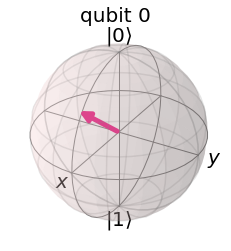

In [77]:
# Create random 1-qubit state
psi = random_statevector(2)

# Display it nicely
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
# Show it on a Bloch sphere
plot_bloch_multivector(psi)

### Create a gate out of the statevector to apply

In [78]:
init_gate = Initialize(psi)
init_gate.label = "init"

### Initialize circuit and registers

In [79]:
qr = QuantumRegister(3, name='q')
crz = ClassicalRegister(1, name = "crz")
crx = ClassicalRegister(1, name = "crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

### Apply functions to circuit to create it

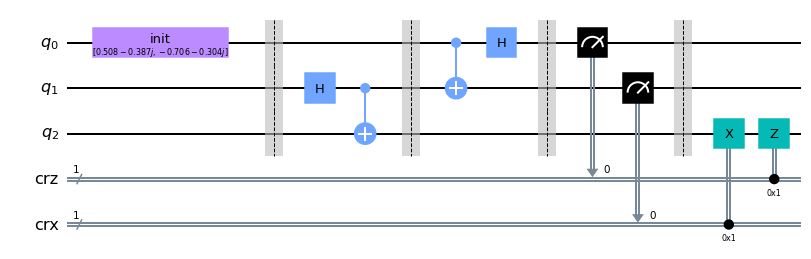

In [80]:

# Setup
teleportation_circuit.append(init_gate, [0])
teleportation_circuit.barrier()

#STEP 1
# Generate bell state
gen_bell(teleportation_circuit, 1, 2)

#STEP 2
# Apply Alice Gates
teleportation_circuit.barrier()
alice_gates(teleportation_circuit, 0, 1)

#STEP 3
# Measure and send to Bob
teleportation_circuit.barrier()
measure_and_send(teleportation_circuit, 0, 1)

# Step 4
teleportation_circuit.barrier()
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw("mpl")

### See that the final statevector(the one Bob receives) is equal to the one that Alice sent

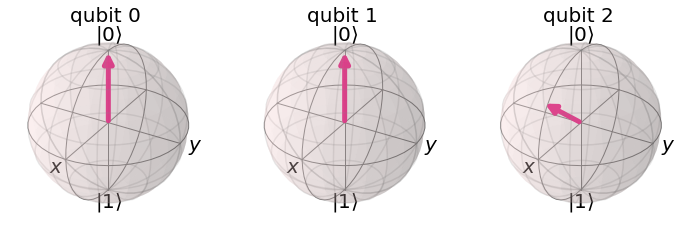

In [81]:
sim = Aer.get_backend('aer_simulator')
teleportation_circuit.save_statevector()
out_vector = sim.run(teleportation_circuit).result().get_statevector()
plot_bloch_multivector(out_vector)